In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('iris1.csv')
data.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [2]:
print(data.shape)
print(data.info())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


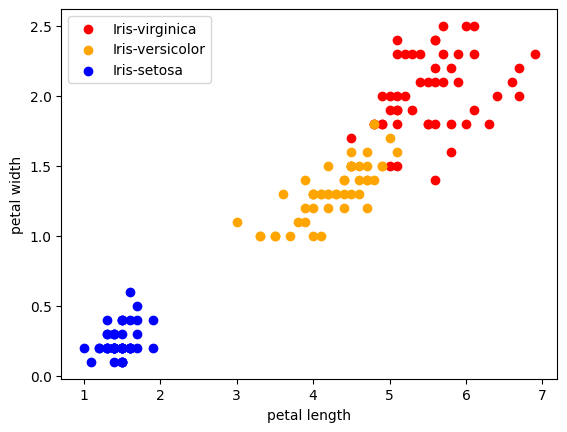

In [3]:
# scatter plot
colors=['red' , 'orange', 'blue']
species=['Iris-virginica','Iris-versicolor' ,'Iris-setosa']

for i in range(3):
    x=data[data['class'] ==species[i]]
    plt.scatter(x['petal_len'], x['petal_wid'] , c=colors[i] , label= species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [4]:
y = data['class']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

KNN Results:
Accuracy: 0.80, Precision: 1.00, Recall: 0.80, F1 Score: 0.89


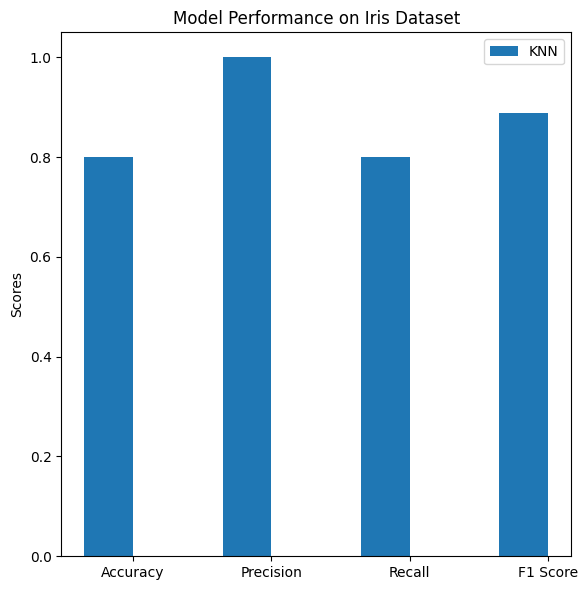

In [7]:
import numpy as np
from collections import Counter

# Step 1: Load datas
columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

# Step 2: Encode labels
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['class'] = data['class'].map(label_map)

# Step 3: Feature and target selection
features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
x = data[features].values
y = data['class'].values

# Step 4: Train-test split (80-20)
split = int(0.8 * len(data))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Step 5: Manual KNN implementation
def knn_predict(x_train, y_train, x_test_point, k=3):
    distances = [np.linalg.norm(x - x_test_point) for x in x_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common

y_pred_knn = [knn_predict(x_train, y_train, x, k=5) for x in x_test]

def evaluate(y_true, y_pred):
    accuracy = sum(y1 == y2 for y1, y2 in zip(y_true, y_pred)) / len(y_true)
    
    precision_list, recall_list, f1_list = [], [], []
    labels = np.unique(y_true)

    for label in labels:
        TP = sum((y_true[i] == label and y_pred[i] == label) for i in range(len(y_true)))
        FP = sum((y_true[i] != label and y_pred[i] == label) for i in range(len(y_true)))
        FN = sum((y_true[i] == label and y_pred[i] != label) for i in range(len(y_true)))
        
        precision = TP / (TP + FP + 1e-6)
        recall = TP / (TP + FN + 1e-6)
        f1 = 2 * precision * recall / (precision + recall + 1e-6)
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    precision = np.mean(precision_list)
    recall = np.mean(recall_list)
    f1 = np.mean(f1_list)

    return accuracy, precision, recall, f1

acc_knn, pre_knn, rec_knn, f1_knn = evaluate(y_test, y_pred_knn)
print("KNN Results:")
print(f"Accuracy: {acc_knn:.2f}, Precision: {pre_knn:.2f}, Recall: {rec_knn:.2f}, F1 Score: {f1_knn:.2f}")
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_scores = [acc_knn, pre_knn, rec_knn, f1_knn]

x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(6, 6))
plt.bar(x - width/2, knn_scores, width, label='KNN')
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('Model Performance on Iris Dataset')
plt.legend()
plt.tight_layout()
plt.show()